In [4]:
# Kernel SVM

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_test, Y_pred))

,0,1
0,64,4
1,3,29


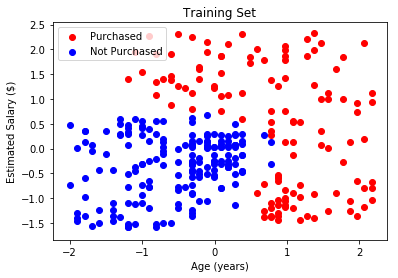

In [11]:
# Visualizing the Training set results
red_x = []
blue_x = []
red_y = []
blue_y = []

for i in range(len(X_train)):
    if classifier.predict([X_train[i]]) == 1:
        red_x.append(X_train[i, 0])
        red_y.append(X_train[i, 1])
    else:
        blue_x.append(X_train[i, 0])
        blue_y.append(X_train[i, 1])

plt.scatter(red_x, red_y, color = 'red', label = 'Purchased')
plt.scatter(blue_x, blue_y, color = 'blue', label = 'Not Purchased')
plt.legend()
plt.title('Training Set')
plt.xlabel('Age (years)')
plt.ylabel('Estimated Salary ($)')
plt.show()

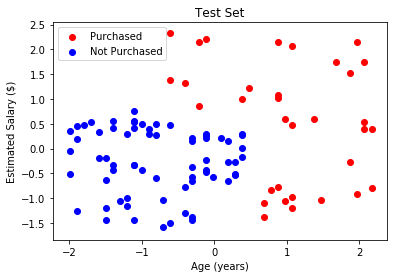

In [12]:
# Visualizing the Test set results
red_x = []
blue_x = []
red_y = []
blue_y = []

for i in range(len(X_test)):
    if Y_pred[i] == 1:
        red_x.append(X_test[i, 0])
        red_y.append(X_test[i, 1])
    else:
        blue_x.append(X_test[i, 0])
        blue_y.append(X_test[i, 1])

plt.scatter(red_x, red_y, color = 'red', label = 'Purchased')
plt.scatter(blue_x, blue_y, color = 'blue', label = 'Not Purchased')
plt.legend()
plt.title('Test Set')
plt.xlabel('Age (years)')
plt.ylabel('Estimated Salary ($)')
plt.show()